In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv("/content/pulsar_stars.csv")

In [3]:
df.shape

(17898, 9)

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
df.columns = df.columns.str.strip()
df.columns
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness',
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [6]:
df['target_class'].value_counts()

,count
target_class,
0,16259
1,1639


In [7]:
df.info

<bound method DataFrame.info of           IP Mean      IP Sd  IP Kurtosis  IP Skewness  DM-SNR Mean  \
0      140.562500  55.683782    -0.234571    -0.699648     3.199833   
1      102.507812  58.882430     0.465318    -0.515088     1.677258   
2      103.015625  39.341649     0.323328     1.051164     3.121237   
3      136.750000  57.178449    -0.068415    -0.636238     3.642977   
4       88.726562  40.672225     0.600866     1.123492     1.178930   
...           ...        ...          ...          ...          ...   
17893  136.429688  59.847421    -0.187846    -0.738123     1.296823   
17894  122.554688  49.485605     0.127978     0.323061    16.409699   
17895  119.335938  59.935939     0.159363    -0.743025    21.430602   
17896  114.507812  53.902400     0.201161    -0.024789     1.946488   
17897   57.062500  85.797340     1.406391     0.089520   188.306020   

       DM-SNR Sd  DM-SNR Kurtosis  DM-SNR Skewness  target_class  
0      19.110426         7.975532        74.242225             0  
1      14.860146        10.576487       127.393580             0  
2      21.744669         7.735822        63.171909             0  
3      20.959280         6.896499        53.593661             0  
4      11.468720        14.269573       252.567306             0  
...          ...              ...              ...           ...  
17893  12.166062        15.450260       285.931022             0  
17894  44.626893         2.945244         8.297092             0  
17895  58.872000         2.499517         4.595173             0  
17896  13.381731        10.007967       134.238910             0  
17897  64.712562        -1.597527         1.429475             0  

[17898 rows x 9 columns]>

In [8]:
# check for missing values in variables
df.isnull().sum()

,0
IP Mean,0
IP Sd,0
IP Kurtosis,0
IP Skewness,0
DM-SNR Mean,0
DM-SNR Sd,0
DM-SNR Kurtosis,0
DM-SNR Skewness,0
target_class,0


In [9]:
X = df.drop(['target_class'], axis=1)
y = df['target_class']

In [10]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

In [12]:
cols = X_train.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


In [14]:
#RBF Kernal
svc=SVC(C=0.1)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with rbf kernel and C=0.1 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=0.1 : 0.9816


In [15]:
#RBF Kernal
svc=SVC(C=10.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with rbf kernel and C=10.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=10.0 : 0.9835


In [16]:
#RBF Kernal
svc=SVC(C=100.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832


In [17]:
#RBF Kernal
svc=SVC(C=500.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with rbf kernel and C=500.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=500.0 : 0.9824


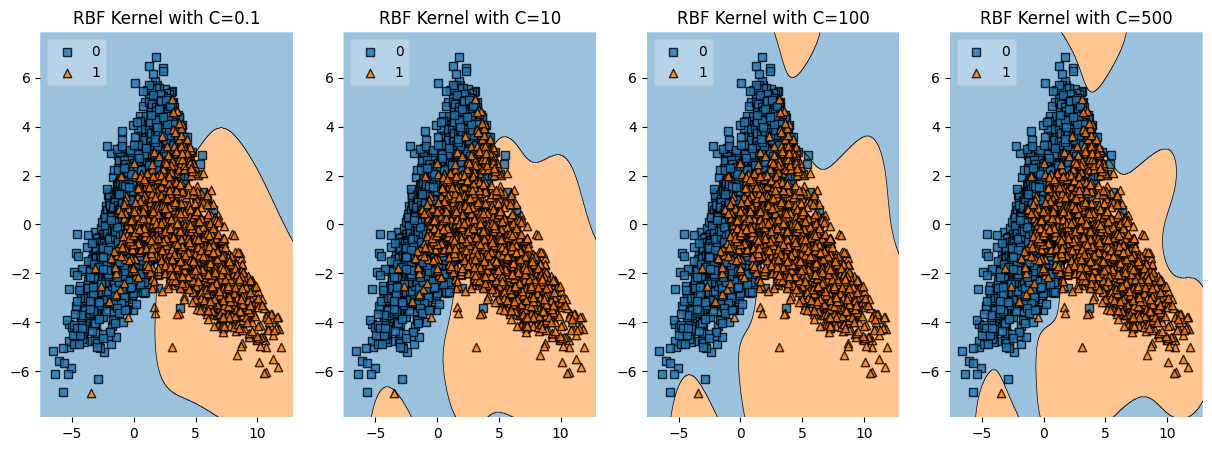

In [18]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
# Convert DataFrame to NumPy arrays
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy().ravel()  # Ensure y_train is 1D
# Reduce dataset to 2D using PCA (only if X_train has more than 2 features)
if X_train_np.shape[1] > 2:
    pca = PCA(n_components=2)
    X_train_2D = pca.fit_transform(X_train_np)
else:
    X_train_2D = X_train_np  # Use original data if it's already 2D

C_values = [0.1, 10, 100, 500]
plt.figure(figsize=(15, 5))
for i, C in enumerate(C_values, 1):
    svc = SVC(kernel='rbf', C=C)
    svc.fit(X_train_2D, y_train_np)
    plt.subplot(1, len(C_values), i)
    plot_decision_regions(X_train_2D, y_train_np, clf=svc, legend=2)
    plt.title(f'RBF Kernel with C={C}')
plt.show()

In [19]:
#Linear
linear_svc=SVC(kernel='linear')
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)
print('Model accuracy score with linear kernel: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel: 0.9830


In [24]:
#Polynomial
poly_svc=SVC(kernel='poly', C=1.0)
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9807


In [25]:
#Sigmoid Kernal
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_test)
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3289   17]
 [  43  231]]

True Positives(TP) =  3289

True Negatives(TN) =  231

False Positives(FP) =  17

False Negatives(FN) =  43


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.89       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [28]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print Classification Accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9832
